# Logistic Regression

### Classification

- Examples of classification problems in ML:
    - Email: Spam/Not Spam?
    - Online Transactions: Fraudulent (Yes/No)?
    - Tumor: Malignant/Benign?
- $y\in$ {0,1}
    - 0: Negative Class
    - 1: Positive Class
- If using linear regression ($h_\mathsf{\theta}(x) = \mathsf{\theta^T}x$), a threshold classifier output $h_\mathsf{\theta}(x)$ at 0.5 would result in something like this:
    - if $h_\mathsf{\theta}(x)\geq$ 0.5, predict "y=1".
    - if $h_\mathsf{\theta}(x)\leq$ 0.5, predict "y=0".
    - However, because training set data might have outliers that cause the threshold to shift and ultimately misclassify some data points, linear regression is usually not a great idea for classification problems.
    
- Logistic Regression: $0\leq h_\mathsf{\theta}(x) \leq 1$

    

### Hypothesis Representation for Logistic Regression

- $h_\mathsf{\theta}(x) = g(\mathsf{\theta^T}x)$
    - $g(z)=\frac{1}{1+e^-z}$
    - $g(z)$ is the sigmoid/logistic function
    - an alternate form of the hypothesis is: $h_\mathsf{\theta}(x) = \frac{1}{1+e^{-{\mathsf{\theta^T}x}}}$
- Interpretation of Hypothesis Output:
    - $h_\mathsf{\theta}(x)$ = estimated probability that y = 1 on input x
    - Example:
        - if $ x = \begin{bmatrix}x_0 \\ x_1\end{bmatrix}$ = $\begin{bmatrix}1 \\ tumorSize\end{bmatrix}$
        - $h_\mathsf{\theta}(x) = 0.7$, You would interpret the results as a 70% chance that the tumor is malignant.
    - Formally, this probabilty is expressed as: $h_\mathsf{\theta}(x) = P(y=1|x;\mathsf{\theta})$, which should be read as 'the probability that y=1, given x, parameterized by $\mathsf{\theta}$'

### Decision Boundary

- Suppose predict "y=1" if $h_\mathsf{\theta}(x) \geq 0.5$ and predict "y=0" if $h_\mathsf{\theta}(x) < 0.5$
- If we visualize the sigmoid function, then $g(z) \geq 0.5$ when $z \geq 0$. Therefore, $h_\mathsf{\theta}(x) = g(\mathsf{\theta^T}x) \geq 0.5$ whenever $\mathsf{\theta^T}x \geq 0$
    - the oppositve would be true whenever $g(\mathsf{\theta^T}x) < 0.5$
- A training set may be used to fit the parameters, but the decision boundary itself is a property of the paramter vector $\mathsf{\theta}$, **not** the training set.

### Cost Function Review

- Training Set: {($x^{(1)},y^{(1)}$),($x^{(2)},y^{(2)}$),...($x^{(m)},y^{(m)}$)}
- m examples $x \in \begin{bmatrix}x_0 \\ x_1 \\ ... \\x_n \end{bmatrix}$
- $h_\mathsf{\theta}(x)=\frac{1}{1+e^{-{\mathsf{\theta^T}x}}}$
- Cost ($h_{\theta}(x,y) = \frac{1}{2}\sum \limits_{i=1} ^{m}(h_{\theta}(x)-y)^2$
    - This form of the cost function worked well for linear regression, but for **logistic** regression, the function is non-convex, meaning there is no guarantee that running gradient descent will arrive at the global minimum.
    
####  Cost Function for Logsitic Regression   
- The cost function for logistic regression will look like this:
    - Cost ($h_{\theta}(x,y))$ = $ \left\{ \begin{array}{ll}
      -log(h_{\theta}(x)) & y = 1 \\
      -log(1-h_{\theta}(x)) & y = 0 \\
\end{array} 
\right.$

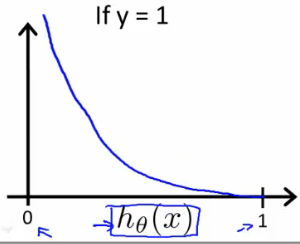
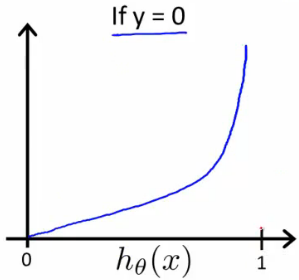

### Simplified Cost Function and Gradient Descent

- $J(\theta) = \frac{1}{m}\sum \limits_{i=1} ^{m}Cost(h_\theta(x^{(i)},y^{(i)})$
    - Cost ($h_{\theta}(x,y))$ = $ \left\{ \begin{array}{ll}
      -log(h_{\theta}(x)) & y = 1 \\
      -log(1-h_{\theta}(x)) & y = 0 \\
\end{array} 
\right.$ 
    - y = 0 or y=1 **always**
    - The cost function can be simplified/compressed into a single, one line equation to make it easier to apply gradient descent when optimizing the parameters $\theta$:
        - Cost ($h_{\theta}(x,y))$ = $-y log(h_\theta(x))-(1-y)log(1-h_\theta(x))$
        - $J(\theta) = -\frac{1}{m}[\sum \limits_{i=1} ^{m} y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$
            - The above cost function is derived from a concept in statistics called the **principle of maximum likelihood estimation.** 
        
- Given our cost function $J(\theta)$ above, we want to $min_{\theta}J(\theta)$:
    - Simultaneously update all $\theta_j$ via:
        - $\theta_j := \theta_j - \alpha\frac{\delta}{\delta\theta_j}J(\theta)$
        - $\frac{\delta}{\delta\theta_j}J(\theta) = \frac{1}{m}\sum \limits_{i=1} ^{m}(h_\theta(x^{(i)}-y^{(i)})x^{(i)}_j$
        - Deriviation of the Cost Function:
            - remember, $h_\mathsf{\theta}(x) = g(\mathsf{\theta^T}x)$ = sigmoid function
            - the derivative of the sigmoid function: $\sigma'(x) = \sigma(x)(1-\sigma(x))$ For a detailed walkthrough of the calculus involved, see https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
            - Our cost function is $J(\theta) = -\frac{1}{m}[\sum \limits_{i=1} ^{m} y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$. We can calculate the derivative using the following steps:
                1. = $-\frac{1}{m}[\sum \limits_{i=1}^{m}[y^{(i)}\frac{\delta}{\delta\theta_j}log(h_\theta(x^{(i)}))+(1-y^{(i)})\frac{\delta}{\delta\theta_j}log(1-h_\theta(x^{(i)}))]$
                2. = $-\frac{1}{m}[\sum \limits_{i=1}^{m}[\frac{y^{(i)}\frac{\delta}{\delta\theta_j}h_\theta(x^{(i)})} {h_\theta(x^{(i)})}+ \frac{(1-y^{(i)})\frac{\delta}{\delta\theta_j}(1-h_\theta(x^{(i)})}{1-h_\theta(x^{(i)})}]$
                3. = $-\frac{1}{m}[\sum \limits_{i=1}^{m}[\frac{y^{(i)}\frac{\delta}{\delta\theta_j}\sigma(\theta^Tx^{(i)})}{h_\theta(x^{(i)})} + \frac{(1-y^{(i)})\frac{\delta}{\delta\theta_j}(1-\sigma(\theta^Tx^{(i)}))}{1-h_\theta(x^{(i)})}]$
                4. = $-\frac{1}{m}[\sum \limits_{i=1}^{m}[\frac{y^{(i)}\sigma(\theta^Tx^{(i)})(1-\sigma(\theta^Tx^{(i)}))\frac{\delta}{\delta\theta_j}\theta^Tx^{(i)}}{h_\theta(x^{(i)})} + \frac{-(1-y^{(i)})\sigma(\theta^Tx^{(i)})(1-\sigma(\theta^Tx^{(i)}))\frac{\delta}{\delta\theta_j}\theta^Tx^{(i)}}{1-h_\theta(x^{(i)})}]$
                5. = $-\frac{1}{m}[\sum \limits_{i=1}^{m}[\frac{y^{(i)}h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))\frac{\delta}{\delta\theta_j}\theta^Tx^{(i)}}{h_\theta(x^{(i)})} - \frac{(1-y^{(i)})h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))\frac{\delta}{\delta\theta_j}\theta^Tx^{(i)}}{1-h_\theta(x^{(i)})}]$
                6. = $-\frac{1}{m}[\sum \limits_{i=1}^{m}[y^{(i)}(1-h_\theta(x^{(i)}))x_j^{(i)} - (1-y^{(i)})h_\theta(x^{(i)})x_j^{(i)}]$
                7. = $-\frac{1}{m}[\sum \limits_{i=1}^{m}[y^{(i)}(1-h_\theta(x^{(i)}))- (1-y^{(i)})h_\theta(x^{(i)})]x_j^{(i)}$
                8. = $-\frac{1}{m}[\sum \limits_{i=1}^{m}[y^{(i)}-y^{(i)}h_\theta(x^{(i)}))- h_\theta(x^{(i)})+y^{(i)}h_\theta(x^{(i)})]x_j^{(i)}$
                9. = $-\frac{1}{m}[\sum \limits_{i=1}^{m}[y^{(i)}-h_\theta(x^{(i)})]x_j^{(i)}$
                10. = $\frac{1}{m}[\sum \limits_{i=1}^{m}[h_\theta(x^{(i)})-y^{(i)}]x_j^{(i)}$
                
             

### Advanced Optimization

- Gradient Descent is not the only optimization algorithm that can be used to minimize $J(\theta)$:
    - Conjugate gradient
    - BFGS
    - L-BFGS
    
- $J(\theta)$ can be optimized in Octave via:
    - theta = $\begin{bmatrix} \theta_0 \\ \theta_1 \\ ...\\ \theta_n \end{bmatrix}$
    - function [jVal, gradient] = costFunction(theta)
        - jVal = [code to compute $J(\theta)$]
        - gradient(1) = [code to compute $\frac{\delta}{\delta\theta_0}J(\theta)$]
        - gradient(2) = [code to compute $\frac{\delta}{\delta\theta_1}J(\theta)$]
        - gradient(n+1) = [code to compute $\frac{\delta}{\delta\theta_n}J(\theta)$]

### Multi-class Classification: One vs. All

- Given n number of possible classes (in the example there are 3 classes), the idea is to fit 3 classifiers with respect to each of the 3 classes.
    - $h_\theta^{(i)}(x) = P(y=i|x;\theta) \: (i=1,2,3)$
    - each classifer has been trained to recognize one of three classes

### Solving the Problem of Overfitting

- Overfitting = if there are too many features, the learned hypothesis may fit the training set very well, but fail to generalize to new examples, i.e. fail to predict the housing price for a new set of data.
- How to address overfitting?
    1. Reduce the number of features.
        - manually select which features to keep
        - model selection algorithm
    2. Regularization
        - Keep all the features but reduce the magnitude/values of parameters $\theta_j$
        - Works well when there are a lot of features, each of which contributes to the prediction y.
- Regularization: Cost Function 
    - Consider the following two hypothesis:
        1. $\theta_0 + \theta_1x+\theta_2x^2$
        2. $\theta_0 + \theta_1x+\theta_2x^2+\theta_3x^3+\theta_4x^4$
    - The first hypothesis is a quadratic equation that fits the example very well, but hypothesis 2 overfits the training data. However, suppose we make $\theta_3$ and $\theta_4$ very small, basically setting them to 0?
    - Add an extra regularization term at the end of our normal cost function:
        - $J(\theta) = \frac{1}{2m}\sum \limits_{i=1} ^{m}(h_\theta(x^{(i)}-y^{(i)})^2 + \lambda \sum \limits_{i=1}^{n} \theta_j^2$

### Regularized Linear Regression

- We will be treating $\theta_0$ a bit differently when applying gradient descent for linear regression:
    - $\theta_0 := \theta_0 - a\frac{1}{m}\sum \limits_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_0^{(i)}$
    - $\theta_j := \theta_j - a\frac{1}{m}\sum \limits_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)}$
        - we can modify the second gradient descent function with our regularization parameter via:
            -  $\theta_j := \theta_j - a\frac{1}{m}\sum \limits_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)}+\frac{\lambda}{m}\theta_j$
            - Equivalently: $\theta_j := \theta_j(1-a\frac{\lambda}{m}) - a\frac{1}{m}\sum \limits_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)}$
            
- Regularization can also be applied to the Normal Equation:
    - $\theta = (X^TX)^{-1}X^Ty$
    - the new normal equation with the regularization component looks like this: $\theta = (X^TX+\lambda L)^{-1}X^Ty$
        - L = an (n+1) by (n+1) matrix with the first term being a 0, the remaining diagnal terms being 1s, and the rest of the terms also equaling 0.
    - if $m \leq n$, then the the cost function $\theta$ will be non-invertible.
        - Regularization takes care of this, so long as $\lambda > 0$
            

### Regularized Logistic Regression

- The cost function for logistic regression is defined as $J(\theta) = -\frac{1}{m}[\sum \limits_{i=1} ^{m} y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$
- For regularization, the equation looks like this: $J(\theta) = -[\frac{1}{m}\sum \limits_{i=1} ^{m} y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m} \sum \limits_{j=1}^{n}\theta_j^2$
- When applying gradient descent, repeat:
    - $\theta_0 := \theta_0 - a\frac{1}{m}\sum \limits_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_0^{(i)}$
    - $\theta_j := \theta_j - a\frac{1}{m}\sum \limits_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)}$
        -  we can modify the second gradient descent function with our regularization parameter via:
            - $\theta_j := \theta_j - a\frac{1}{m}\sum \limits_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j$